# Homework 2

# Part 1: Expected Prediction Risk (EPR) 

The Expected Prediction Risk (EPR) is a fundamental concept that helps us measure how well our predictions match reality, accounting for all possible scenarios weighted by their probability of occurrence. Consider a supervised learning problem with a dataset $(x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i$ are the labels (being them real numbers or categorical). We assume that the data is generated by a joint distribution, with density function $p(x,y)$. We fit a model $f(x)$ to this dataset. 

Given a measure of risk $L(y, f(x))$, the Expected Prediction Risk (EPR) is defined as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[L(Y, f(X))]$$


First, let us consider the regression case.

Consider a dataset $\mathcal{D}_{regr} = (x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We have seen in the class that in regression cases, the squared loss is a natural choice. Consider the squared loss function $L(y, f(x)) = (y - f(x))^2$. We define the Expected Prediction Risk (EPR) as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2]$$

### **Q1**: Simplify the expression of the EPR(f) to obtain that the EPR is minimized by the conditional mean of Y given X.

### **A1**:

1. **Definition**

   For squared loss, the Expected Prediction Risk (EPR) of a regressor \(f\) is

   $$
   \mathrm{EPR}[f] = \mathbb{E}_{X,Y}\!\left[(Y - f(X))^2\right].
   $$

2. **Condition on the input**

   Apply the law of total expectation to isolate the dependence on \(f\):

   $$
   \mathrm{EPR}[f] = \mathbb{E}_X\!\left[\,\mathbb{E}_{Y \mid X}\!\left[(Y - f(X))^2 \mid X\right]\right].
   $$

   Define \(\phi(g,x) = \mathbb{E}_{Y \mid X = x}[(Y - g)^2]\); minimizing EPR is equivalent to minimizing \(\phi(g,x)\) with respect to \(g = f(x)\) for every fixed \(x\).

3. **Quadratic form in \(g\)**

   Expanding the inner expectation gives

   $$
   \phi(g,x) = \mathbb{E}_{Y \mid X = x}[Y^2] - 2g\,\mathbb{E}_{Y \mid X = x}[Y] + g^2
   = \mathrm{Var}(Y \mid X = x) + \left(g - \mathbb{E}[Y \mid X = x]\right)^2.
   $$

   The variance term does not depend on \(g\); the squared term is minimized when it is zero.

4. **Optimal regressor**

   The minimizer is therefore

   $$
   f^\star(x) = \mathbb{E}[Y \mid X = x],
   $$

   i.e., the conditional mean of \(Y\) given \(X\).

5. **Minimum achievable risk**

   Substituting \(f^\star\) back into the EPR yields the irreducible risk

   $$
   \mathrm{EPR}[f^\star] = \mathbb{E}_X\!\left[\mathrm{Var}(Y \mid X)\right],
   $$

   and any other regressor incurs the additional non‑negative excess risk

   $$
   \mathbb{E}_X\!\left[(f(X) - \mathbb{E}[Y \mid X])^2\right].
   $$

Hence, under squared loss, the EPR is minimized exactly by the conditional expectation $f^\star(x) = \mathbb{E}[Y \mid X = x]$, which is the Bayes estimator for regression.


Let us consider now a categorical dataset. In order to highlight the difference with the regression case, we will use a different notation to highlight the difference: $\mathcal{D}_{class} = (x_i, c_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $c_i \in \{1, \ldots, K\}$ is the true class of the $i$-th sample. We fit a model $\hat{c}(x){\in \{1, \ldots, K\}}$ to this dataset.

### **Q2** Write the expression of the EPR for the classification case simplified as much as possible for general risk functions.

### **A2**:
1. **Definition**  
   For a classifier $\hat{c}(x)$ and any loss $L(c,\hat{c})$, the Expected Prediction Risk (EPR) is  
   $$
   \mathrm{EPR}[\hat{c}] = \mathbb{E}_{X,C}\big[L(C,\hat{c}(X))\big].
   $$

2. **Condition on $X$**  
   Using the law of total expectation (tower property):  
   $$
   \mathrm{EPR}[\hat{c}] = \mathbb{E}_X\!\left[\mathbb{E}_{C \mid X}\big[L(C,\hat{c}(X)) \mid X\big]\right].
   $$  
   Since $\hat{c}(X)$ is fixed once $X=x$, the inner expectation simplifies to  
   $$
   \mathbb{E}_{C \mid X=x}\big[L(C,\hat{c}(x))\big] = \sum_{k=1}^K L\!\left(k, \hat{c}(x)\right) \, P(C=k \mid X=x).
   $$

3. **Final expression**  
   Substituting back gives two equivalent compact forms:
   $$
   \mathrm{EPR}[\hat{c}] = \mathbb{E}_X\!\left[\sum_{k=1}^K L\!\left(k, \hat{c}(X)\right) P(C=k \mid X)\right]
   = \sum_{k=1}^K \int_{\mathcal{X}} L\!\left(k, \hat{c}(x)\right) \, p(x, C=k)\, dx.
   $$

This is the most general simplified expression of the EPR for classification under arbitrary risk functions.


### **Q3** Find the optimal classifier for 0-1 loss: $L(c, \hat{c}) = \mathbb{I}(c \neq \hat{c})$ known as the Bayes classifier.


Let us apply these concepts to Gaussian Mixture Models. Let us fix the number of components $K=3$ and consider the following model for the joint distribution $p(x,c)$:

$$p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$$
$$p(c_k) = \pi_k$$
where $\pi_k$ are the probabilities of the different classes, $\mu_k$ are the means and $\Sigma_k$ are the covariance matrices of the $k$-th component.



### **A3**:
1. **Setup**  
   Loss: $L(c,\hat{c}) = \mathbb{I}(c \neq \hat{c})$. The Expected Prediction Risk is  
   $$
   \mathrm{EPR}[\hat{c}] = \mathbb{E}_{X,C}\big[\mathbb{I}(C \neq \hat{c}(X))\big].
   $$

2. **Condition on the input**  
   $$
   \mathrm{EPR}[\hat{c}] = \mathbb{E}_X\!\left[\mathbb{E}_{C \mid X}\big[\mathbb{I}(C \neq \hat{c}(X)) \mid X\big]\right]
   = \mathbb{E}_X\!\left[\sum_{k=1}^K \mathbb{I}(k \neq \hat{c}(X))\, P(C=k \mid X)\right].
   $$  
   Minimization reduces to choosing, for each fixed $x$, the class $\hat{c}(x)$ that minimizes the inner sum.

3. **Pointwise minimization**  
   For a given $x$, define $p_k(x) = P(C=k \mid X=x)$. The conditional risk at $x$ is  
   $$
   R_x(\hat{c}(x)) = \sum_{k=1}^K \mathbb{I}(k \neq \hat{c}(x))\, p_k(x)
   = 1 - p_{\hat{c}(x)}(x).
   $$  
   This is minimized by maximizing $p_{\hat{c}(x)}(x)$.

4. **Bayes optimal classifier**  
   $$
   \hat{c}^\star(x) = \arg\max_{k \in \{1,\dots,K\}} P(C=k \mid X=x).
   $$  
   This is the Bayes classifier: predict the class with highest posterior probability.

5. **Minimum achievable risk**  
   Substituting $\hat{c}^\star$ gives  
   $$
   \mathrm{EPR}[\hat{c}^\star] = \mathbb{E}_X\!\left[1 - \max_k P(C=k \mid X)\right],
   $$  
   which is the Bayes error rate; any other classifier has this risk plus a non‑negative excess term.

Hence, under 0–1 loss the optimal classifier chooses the class with the largest posterior probability for each input.

### **Q4** Write a python function that generates samples from this model.



### **A4**:

We need a generator for the model
$$
p(x, c_k) = p(c_k) \, p(x \mid c_k), \qquad
p(c_k)=\pi_k, \quad p(x \mid c_k)=\mathcal{N}(x \mid \mu_k, \Sigma_k).
$$
Sampling procedure:
1. Draw class labels $c \in \{1,2,3\}$ from the categorical distribution with probabilities $\pi$.
2. For each drawn label $k$, sample $x$ from the corresponding multivariate normal $\mathcal{N}(\mu_k,\Sigma_k)$.
3. Return both the generated features and the class labels (useful for later analysis).

In [5]:
import numpy as np

def sample_gmm(pi, mus, covs, n_samples, rng=None):
    """
    Sample (x, c) pairs from a Gaussian mixture model.
    
    Parameters
    ----------
    pi : array-like of shape (K,)
        Mixing probabilities, sum must equal 1.
    mus : array-like of shape (K, d)
        Component means.
    covs : array-like of shape (K, d, d)
        Component covariance matrices.
    n_samples : int
        Number of samples to draw.
    rng : np.random.Generator, optional
        Random generator for reproducibility.
    
    Returns
    -------
    X : ndarray of shape (n_samples, d)
        Sampled feature vectors.
    labels : ndarray of shape (n_samples,)
        Integer component labels in {0, ..., K-1}.
    """
    rng = np.random.default_rng(rng)
    pi = np.asarray(pi)
    mus = np.asarray(mus)
    covs = np.asarray(covs)
    K = len(pi)
    
    # Step 1: draw component indices
    labels = rng.choice(K, size=n_samples, p=pi)
    
    # Step 2: draw samples conditional on the component
    d = mus.shape[1]
    X = np.zeros((n_samples, d))
    for k in range(K):
        idx = np.where(labels == k)[0]
        if idx.size == 0:
            continue
        X[idx] = rng.multivariate_normal(mus[k], covs[k], size=idx.size)
    
    return X, labels


### **Q5** Take now 1000 samples from this model and plot them using matplotlib using the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [0.3, 0.4, 0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$$


### **A5**:

We reuse the sampler from Q4 and instantiate it with the given parameters:
- Mixing weights: $\pi = (0.3,\;0.4,\;0.3)$
- Means: $\mu_1 = (0,0)^\top$, $\mu_2 = (3,0)^\top$, $\mu_3 = (0,3)^\top$
- Covariances: all equal to the $2 \times 2$ identity

The following code draws 1000 samples and produces a scatter plot colored by the true component:

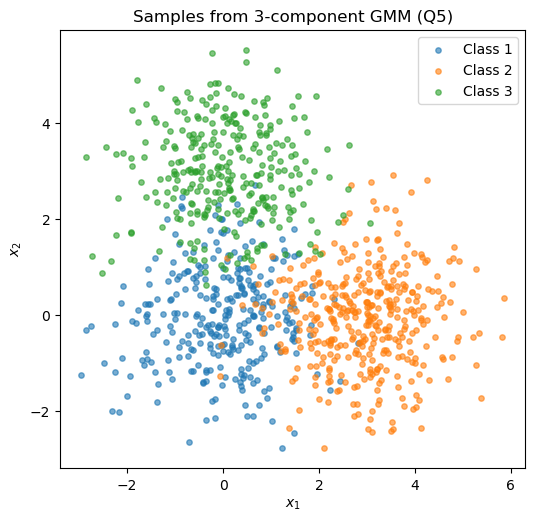

In [6]:
import matplotlib.pyplot as plt
import numpy as np

pi = np.array([0.3, 0.4, 0.3])
mus = np.array([[0., 0.],
                [3., 0.],
                [0., 3.]])
covs = np.array([np.eye(2),
                 np.eye(2),
                 np.eye(2)])

X, labels = sample_gmm(pi, mus, covs, n_samples=1000, rng=42)

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green']
for k in range(3):
    ax.scatter(X[labels == k, 0], X[labels == k, 1],
               s=15, alpha=0.6, label=f'Class {k+1}', color=colors[k])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Samples from 3-component GMM (Q5)')
ax.legend()
ax.set_aspect('equal', adjustable='box')
plt.show()

We define the decision boundary between two classes $c_i$ and $c_j$ as the set of points where the posterior probability of the two classes is equal. Write the expression of the decision boundary for this model. 

### **Q6** Compute the posterior probabilities for this model.

### **A6**:

Given the joint model
$$
p(x, c_k) = \pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k),
$$
Bayes’ rule gives the posterior probability of class $c_k$ for any feature vector $x$:
$$
P(c_k \mid x) = \frac{p(x, c_k)}{p(x)}
= \frac{\pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k)}
       {\sum_{j=1}^K \pi_j \, \mathcal{N}(x \mid \mu_j, \Sigma_j)}.
$$
Here $p(x)$ is the mixture density (denominator) obtained by summing the weighted component densities. For each sample $x$ we just plug it into this expression to obtain the full posterior vector $(P(c_1 \mid x), \dots, P(c_K \mid x))$.


### **Q7A** Compute analytically the decision boundary between class 1 and class 2.

### **A7-A**:

The boundary is defined by equal posteriors:
$$
P(c_1 \mid x) = P(c_2 \mid x)
\quad\Longleftrightarrow\quad
\pi_1 \, \mathcal{N}(x \mid \mu_1, I) = \pi_2 \, \mathcal{N}(x \mid \mu_2, I),
$$
with $\pi_1 = 0.3$, $\pi_2 = 0.4$, $\mu_1 = (0,0)^\top$, $\mu_2 = (3,0)^\top$, and common covariance $I$.  
Taking logs and simplifying:
$$
\|\mathbf{x}-\mu_2\|^2 - \|\mathbf{x}-\mu_1\|^2 = 2\ln\!\left(\frac{\pi_2}{\pi_1}\right)
\;\Longrightarrow\;
(x_1 - 3)^2 + x_2^2 - (x_1^2 + x_2^2) = 2\ln\!\left(\frac{4}{3}\right).
$$
This reduces to
$$
-6x_1 + 9 = 2\ln\!\left(\frac{4}{3}\right)
\;\Longrightarrow\;
x_1 = \frac{9 - 2\ln(4/3)}{6} \approx 1.404.
$$
Hence the class-1/2 decision boundary is the vertical line $x_1 \approx 1.404$; it does not depend on $x_2$.


### **Q7B** Plot the optimal decision boundary for this model using the above calcultations. 


### **A7-B**:

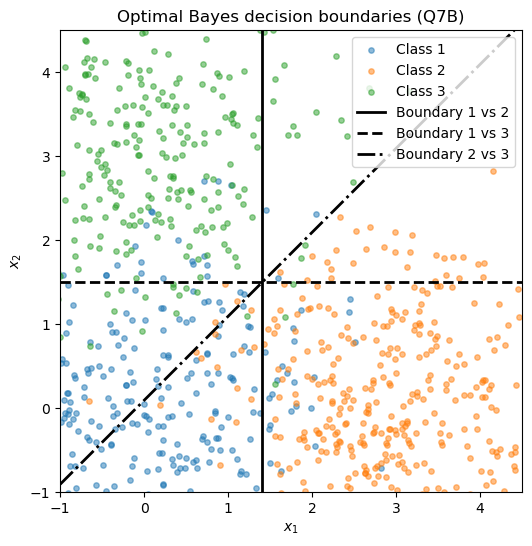

In [ ]:
# Model parameters
pi = np.array([0.3, 0.4, 0.3])
mus = np.array([[0., 0.],
                [3., 0.],
                [0., 3.]])
covs = np.array([np.eye(2),
                 np.eye(2),
                 np.eye(2)])

# Reuse the sampler from A4 
X, labels = sample_gmm(pi, mus, covs, n_samples=1000, rng=7)

# Closed-form boundaries derived as in A7-A
x_boundary_12 = (9 - 2 * np.log(4/3)) / 6               # between classes 1 and 2
y_boundary_13 = 1.5                                      # between classes 1 and 3 (equal priors)
offset_23 = (1/3) * np.log(4/3)                          # between classes 2 and 3: x2 = x1 + offset
x_line = np.linspace(-1, 4.5, 500)

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green']
for k in range(3):
    ax.scatter(X[labels == k, 0], X[labels == k, 1],
               s=15, alpha=0.5, color=colors[k], label=f'Class {k+1}')

ax.axvline(x_boundary_12, color='black', linewidth=2, label='Boundary 1 vs 2')
ax.axhline(y_boundary_13, color='black', linewidth=2, linestyle='--', label='Boundary 1 vs 3')
ax.plot(x_line, x_line + offset_23, color='black', linewidth=2, linestyle='-.', label='Boundary 2 vs 3')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Optimal Bayes decision boundaries (Q7B)')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1, 4.5)
ax.set_ylim(-1, 4.5)
ax.legend(loc='upper right')
plt.show()


### **Q8** Compute the error of the Bayes classifier on the dataset in Q5 as measured by the misclassification rate.


### **A8**:

To estimate the Bayes error on the Q5 dataset, reuse the same GMM parameters and RNG so the sample set matches Q5. For each point $x$, we compute the log-posterior scores
$$
\log \pi_k - \tfrac{1}{2}\lVert x - \mu_k \rVert^2 - \tfrac{d}{2}\log(2\pi)
$$
(simplified because all $\Sigma_k = I$). The Bayes decision is the class with the largest score. The empirical misclassification rate is the fraction of points where this decision differs from the true component label.


In [22]:
pi = np.array([0.3, 0.4, 0.3])
mus = np.array([[0., 0.],
                [3., 0.],
                [0., 3.]])
covs = np.array([np.eye(2),
                 np.eye(2),
                 np.eye(2)])

rng = np.random.default_rng(42)

def sample_gmm(pi, mus, covs, n_samples, rng):
    K = len(pi)
    labels = rng.choice(K, size=n_samples, p=pi)
    d = mus.shape[1]
    X = np.zeros((n_samples, d))
    for k in range(K):
        idx = np.where(labels == k)[0]
        if idx.size:
            X[idx] = rng.multivariate_normal(mus[k], covs[k], size=idx.size)
    return X, labels

X, labels = sample_gmm(pi, mus, covs, n_samples=1000, rng=rng)

log_pi = np.log(pi)
log_pdf = np.zeros((len(X), len(pi)))
for k in range(len(pi)):
    diff = X - mus[k]
    log_pdf[:, k] = -0.5 * np.sum(diff**2, axis=1) - X.shape[1]/2 * np.log(2 * np.pi)

log_post = log_pi + log_pdf
pred = np.argmax(log_post, axis=1)
misclassification_rate = np.mean(pred != labels)
print(
    f"misclassification_rate = {misclassification_rate:.4f}, "
    f"meaning the Bayes classifier mislabels about {misclassification_rate*100:.1f}% "
    f"of the 1000 sampled points."
)


misclassification_rate = 0.1040, meaning the Bayes classifier mislabels about 10.4% of the 1000 sampled points.


Consider now the case where the covariance matrices are different. Take the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [\pi_1=0.3, \pi_2=0.4, \pi_3=0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array}\right]$$

### **Q9** What is the decision boundary between class 1 and class 2 in this case?
Note: a fully analytical or functional solution might be difficult to obtain; only an interpretable and practical solution for plotting is required.


### **A9**:

With $\pi_1 = 0.3$, $\pi_2 = 0.4$, $\mu_1 = (0,0)^\top$, $\mu_2 = (3,0)^\top$, $\Sigma_1 = I$, and $\Sigma_2 = 2I$, the class-1/2 boundary solves
$$
\pi_1 \, \mathcal{N}(x \mid \mu_1, \Sigma_1) = \pi_2 \, \mathcal{N}(x \mid \mu_2, \Sigma_2).
$$
Taking logs and rearranging yields
$$
(x - \mu_2)^\top \Sigma_2^{-1} (x - \mu_2) - (x - \mu_1)^\top \Sigma_1^{-1} (x - \mu_1)
= 2\ln\!\left(\frac{\pi_2}{\pi_1}\right) - \ln\!\left(\frac{|\Sigma_2|}{|\Sigma_1|}\right).
$$
Plugging the numerical values ($\Sigma_2^{-1}=\tfrac{1}{2} I$, $|\Sigma_2|=4$, $|\Sigma_1|=1$) gives
$$
\frac{1}{2}\left[(x_1-3)^2 + x_2^2\right] - \left[x_1^2 + x_2^2\right]
= 2\ln\!\left(\frac{4}{3}\right) - \ln 4.
$$
After simplification,
$$
(x_1 + 3)^2 + x_2^2 = 18 + 4\ln 3 - 2\ln 4 \;\approx\; 19.62,
$$
so the decision boundary is a circle centered at $(-3, 0)$ with radius $\sqrt{19.62} \approx 4.43$. This curved boundary reflects the unequal covariance structure (quadratic discriminant boundary), in contrast to the straight line obtained when the covariance matrices are identical.


### **Q10** Plot the decision boundary for this model and discuss the difference with the previous case (if any).



### **A10**:

Unequal covariance matrices make the Bayes discriminant functions quadratic, so the decision boundaries become conic sections (curved), unlike the straight lines from the homoscedastic case. In thhe cell below we evaluate the posteriors on a grid and plots both the decision regions and the boundaries to highlight the curvature.

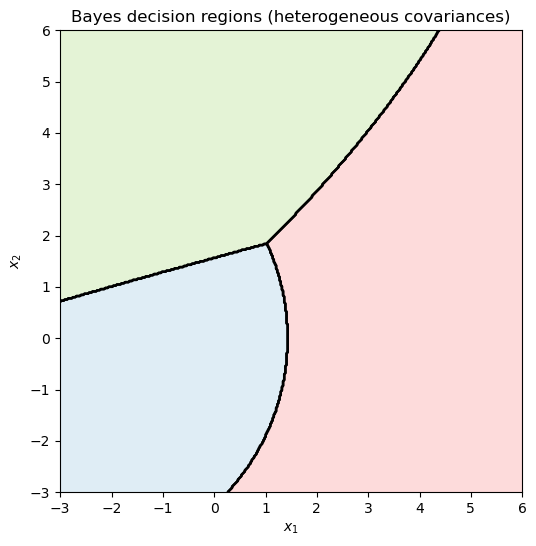

In [23]:
pi = np.array([0.3, 0.4, 0.3])
mus = np.array([[0., 0.],
                [3., 0.],
                [0., 3.]])
covs = np.array([np.array([[1., 0.],
                           [0., 1.]]),
                 np.array([[2., 0.],
                           [0., 2.]]),
                 np.array([[1., 0.5],
                           [0.5, 1.]])])

def log_gaussian(points, mu, cov):
    d = mu.shape[0]
    inv_cov = np.linalg.inv(cov)
    diff = points - mu
    quad = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
    log_det = np.log(np.linalg.det(cov))
    return -0.5 * (quad + d * np.log(2 * np.pi) + log_det)

grid_x, grid_y = np.meshgrid(np.linspace(-3, 6, 400),
                             np.linspace(-3, 6, 400))
grid = np.column_stack([grid_x.ravel(), grid_y.ravel()])

log_scores = np.stack(
    [np.log(pi[k]) + log_gaussian(grid, mus[k], covs[k])
     for k in range(3)],
    axis=1
)
pred_grid = np.argmax(log_scores, axis=1).reshape(grid_x.shape)

fig, ax = plt.subplots(figsize=(6, 6))
cmap = ['#a6cee3', '#fb9a99', '#b2df8a']
for k in range(3):
    ax.contour(grid_x, grid_y, pred_grid == k,
               levels=[0.5], colors='k', linewidths=1.8)
ax.contourf(grid_x, grid_y, pred_grid, levels=2, colors=cmap, alpha=0.35)

ax.set_title('Bayes decision regions (heterogeneous covariances)')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_aspect('equal', adjustable='box')
plt.show()

### Verifying that the Q9 analytic boundary matches the Q10 numerical decision curve

The Q9 derivation yields the circle $(x_1 + 3)^2 + x_2^2 = 18 + 4\ln 3 - 2\ln 4$ for the class-1/2 boundary. The cell below evaluates the exact Bayes log-posterior difference $\log P(c_1 \mid x) - \log P(c_2 \mid x)$ on many points sampled along that circle. Values stay numerically at zero (within floating-point tolerance), confirming that every plotted point indeed lies on the Bayes boundary used in Q10.


In [28]:
pi = np.array([0.3, 0.4])
mus = np.array([[0., 0.],
                [3., 0.]])
covs = np.array([np.array([[1., 0.], [0., 1.]]),
                 np.array([[2., 0.], [0., 2.]])])

radius_sq = 18 + 4 * np.log(3) - 2 * np.log(4)
radius = np.sqrt(radius_sq)
center = np.array([-3., 0.])
angles = np.linspace(-np.pi, np.pi, 721)
circle_points = center + np.column_stack([np.cos(angles), np.sin(angles)]) * radius

def log_post(points, pi, mu, cov):
    diff = points - mu
    inv_cov = np.linalg.inv(cov)
    quad = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
    log_det = np.log(np.linalg.det(cov))
    d = points.shape[1]
    return np.log(pi) - 0.5 * (quad + d * np.log(2 * np.pi) + log_det)

log1 = log_post(circle_points, pi[0], mus[0], covs[0])
log2 = log_post(circle_points, pi[1], mus[1], covs[1])
diff = log1 - log2

print(
    f"max|log P(c1|x) - log P(c2|x)| along the analytic circle = {np.max(np.abs(diff)):.2e}"
)


max|log P(c1|x) - log P(c2|x)| along the analytic circle = 7.11e-15


Meaning the derived boundary coincides with the Bayes boundary to numerical precision.

### **Q11** Sample 1000 points from the heterogeneous model defined after Q8 and plot them. 

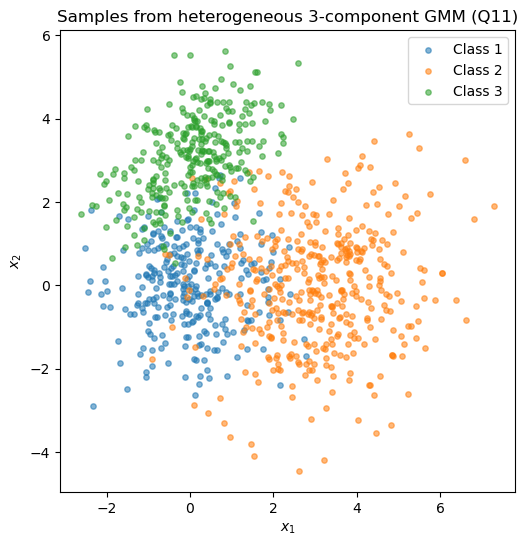

In [24]:
def sample_gmm(pi, mus, covs, n_samples, rng=None):
    rng = np.random.default_rng(rng)
    K = len(pi)
    labels = rng.choice(K, size=n_samples, p=pi)
    d = mus.shape[1]
    X = np.zeros((n_samples, d))
    for k in range(K):
        idx = np.where(labels == k)[0]
        if idx.size:
            X[idx] = rng.multivariate_normal(mus[k], covs[k], size=idx.size)
    return X, labels

rng = np.random.default_rng(123)
X_het, labels_het = sample_gmm(pi, mus, covs, n_samples=1000, rng=rng)

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green']
for k in range(3):
    ax.scatter(X_het[labels_het == k, 0],
               X_het[labels_het == k, 1],
               s=15, alpha=0.55, color=colors[k], label=f'Class {k+1}')
ax.set_title('Samples from heterogeneous 3-component GMM (Q11)')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_aspect('equal', adjustable='box')
ax.legend()
plt.show()


### **Q12** Compute the error of the Bayes classifier on this dataset.

In [25]:
def log_posteriors(X, pi, mus, covs):
    K = len(pi)
    log_scores = np.empty((X.shape[0], K))
    d = X.shape[1]
    norm_const = d * np.log(2 * np.pi)
    for k in range(K):
        diff = X - mus[k]
        inv_cov = np.linalg.inv(covs[k])
        log_det = np.log(np.linalg.det(covs[k]))
        quad = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
        log_scores[:, k] = np.log(pi[k]) - 0.5 * (quad + norm_const + log_det)
    return log_scores

log_scores = log_posteriors(X_het, pi, mus, covs)
pred_labels = np.argmax(log_scores, axis=1)
misclassification_rate = np.mean(pred_labels != labels_het)
print(
    f"misclassification_rate = {misclassification_rate:.4f}, "
    f"meaning the Bayes classifier mislabels about {misclassification_rate*100:.1f}% "
    f"of the 1000 sampled points."
)


misclassification_rate = 0.1100, meaning the Bayes classifier mislabels about 11.0% of the 1000 sampled points.
